<a href="https://colab.research.google.com/github/supunabeywickrama/HospitalManagementSystem/blob/master/Moments_Sorting_Approximating_and_Matching_Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image=None, size=10):
  w,h =image.shape[0], image.shape[1]
  aspect_ratio= w/h
  plt.figure(figsize=(size * aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

In [2]:
!wget https://littletogreatscientists.com/wp-content/uploads/2021/01/LSCUPK3-5-1.jpg

--2025-09-28 04:34:36--  https://littletogreatscientists.com/wp-content/uploads/2021/01/LSCUPK3-5-1.jpg
Resolving littletogreatscientists.com (littletogreatscientists.com)... 104.21.54.22, 172.67.222.133, 2606:4700:3031::ac43:de85, ...
Connecting to littletogreatscientists.com (littletogreatscientists.com)|104.21.54.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68192 (67K) [image/jpeg]
Saving to: ‘LSCUPK3-5-1.jpg’

LSCUPK3-5-1.jpg     100%[===================>]  66.59K  --.-KB/s    in 0.006s  

2025-09-28 04:34:36 (10.3 MB/s) - ‘LSCUPK3-5-1.jpg’ saved [68192/68192]



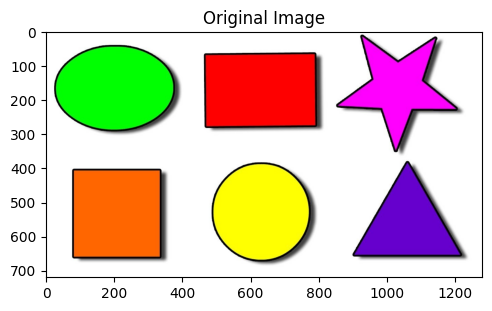

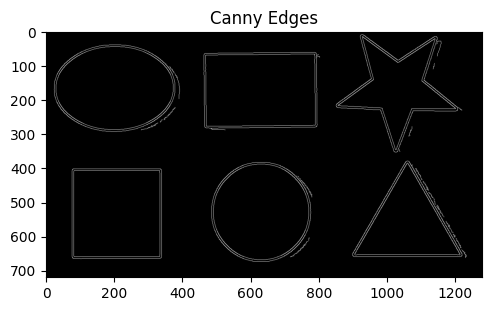

Number of Contours found = 95


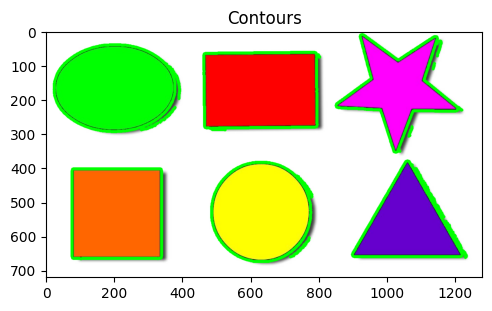

In [5]:
image=cv2.imread("LSCUPK3-5-1.jpg")
imshow("Original Image", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 50, 200)
imshow("Canny Edges", edged)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours)))

cv2.drawContours(image, contours, -1, (0, 255, 0), 8)
imshow("Contours", image)


Sorting Are Using cv2.ContourArea and cv2.Moments

Contour Areas before sorting
[3.0, 1.0, 4.0, 1.0, 1.0, 0.0, 0.5, 3.5, 0.0, 1.5, 0.5, 0.5, 1.5, 3.5, 0.0, 1.0, 1.5, 0.5, 0.5, 3.0, 2.0, 4.0, 1.0, 1.0, 3.0, 2.5, 0.5, 1.5, 3.0, 5.0, 0.5, 0.5, 1.5, 2.5, 2.5, 4.5, 1.0, 1.5, 1.5, 3.5, 5.0, 5.0, 1.5, 1.5, 0.0, 5.0, 0.5, 1.0, 6.0, 1.0, 1.0, 6.0, 0.5, 2.5, 0.0, 1.0, 0.0, 0.0, 5.0, 0.5, 68884.0, 4.0, 0.5, 66925.5, 47467.5, 0.5, 5.5, 4.5, 3.5, 4.0, 1.0, 0.0, 0.5, 0.5, 3.0, 1.0, 0.5, 1.5, 1.0, 0.0, 0.5, 3.5, 1.5, 3.0, 5.0, 4.5, 1.0, 2.5, 0.0, 2.0, 72333.0, 71179.5, 0.5, 2.5, 47626.0]
Contour Areas after sorting
[72333.0, 71179.5, 68884.0, 66925.5, 47626.0, 47467.5, 6.0, 6.0, 5.5, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.5, 4.5, 4.5, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.0, 2.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

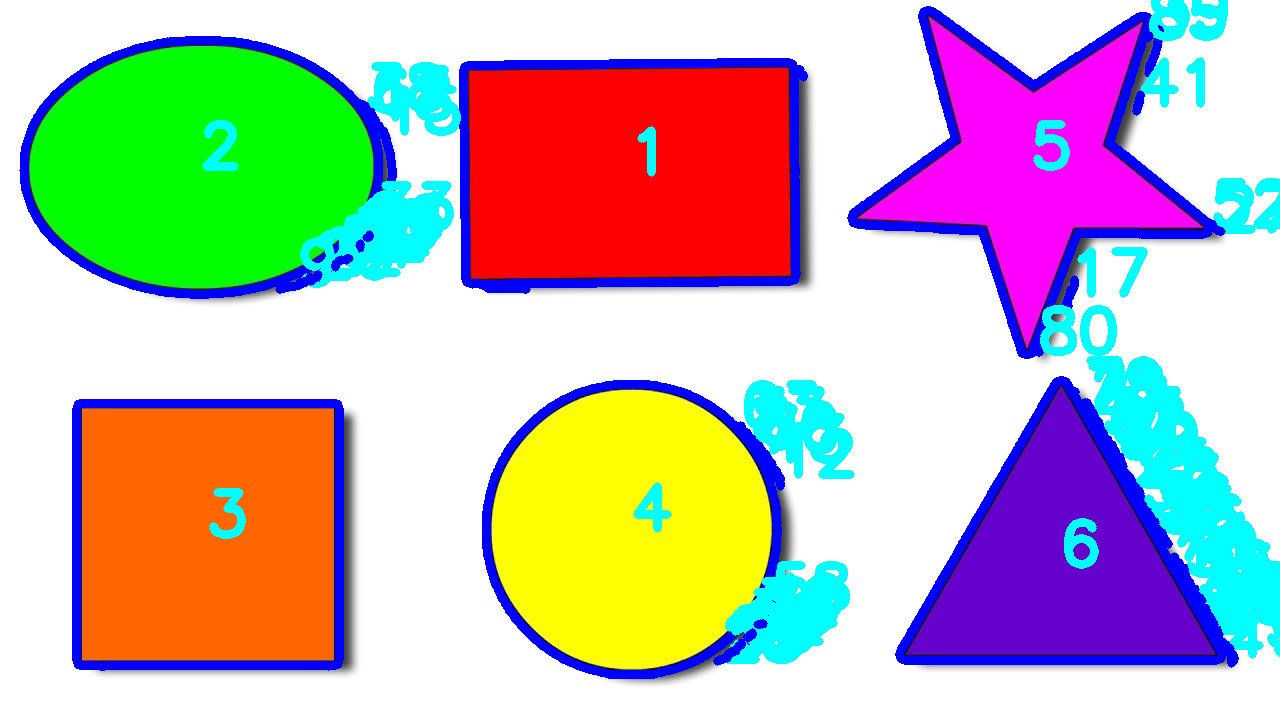

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def get_contour_areas(contours):
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

image= cv2.imread("LSCUPK3-5-1.jpg")

print("Contour Areas before sorting")
print(get_contour_areas(contours))

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("Contour Areas after sorting")
print(get_contour_areas(sorted_contours))

for (i,c) in enumerate(sorted_contours):
    M=cv2.moments(c)
    if M['m00'] != 0:  # Check if the area is not zero
        cx=int(M['m10']/M['m00'])
        cy=int(M['m01']/M['m00'])
        cv2.putText(image, str(i+1), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,0),8)
        cv2.drawContours(image, [c], -1, (255,0,0), 8)

cv2_imshow(image)

In [36]:
def x_cord_contour(contours):
    M = cv2.moments(contours)
    if M['m00'] != 0: # Check for non-zero area
        if cv2.contourArea(contours) > 10:
            return (int(M['m10']/M['m00']))
        else:
            return -1
    else: # Return a value that won't cause issues in sorting if area is zero
        return -1

def label_contour_center(image, c):
    M = cv2.moments(c)
    if M['m00'] != 0: # Check for non-zero area
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.circle(image, (cx, cy), 10, (0, 0, 255), -1)
        return image
    else:
        return image # Return original image if area is zero

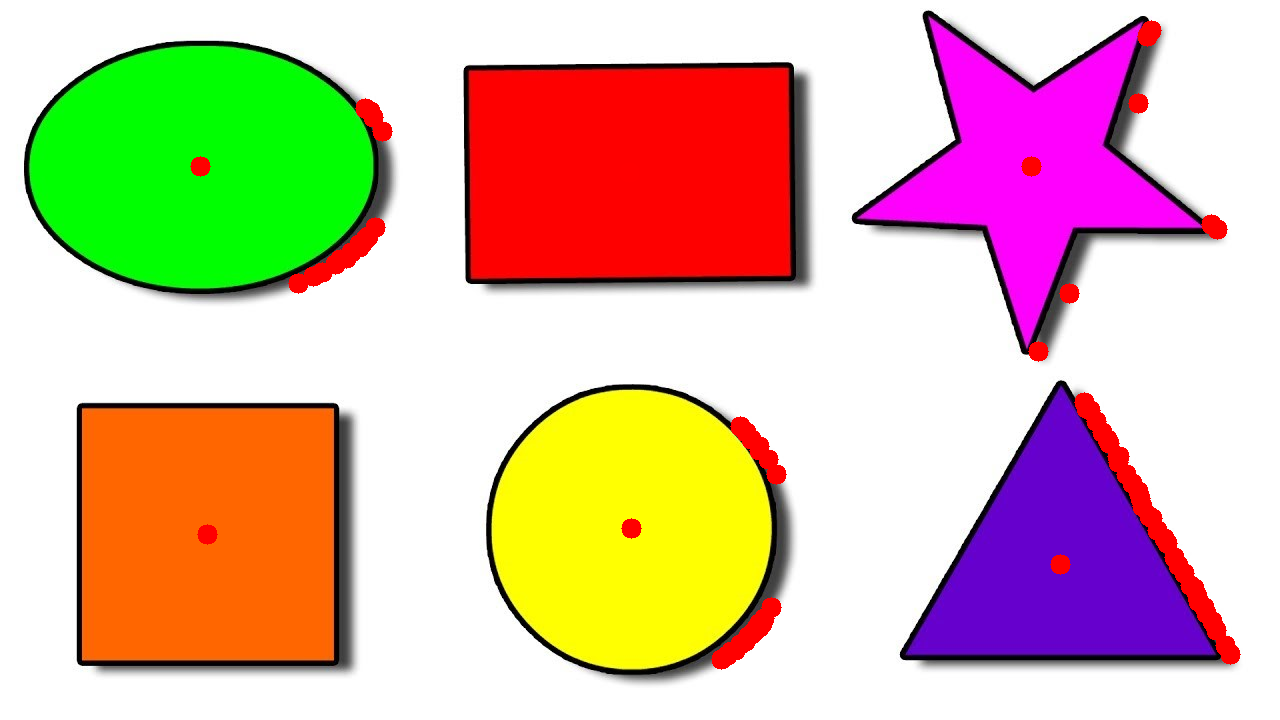

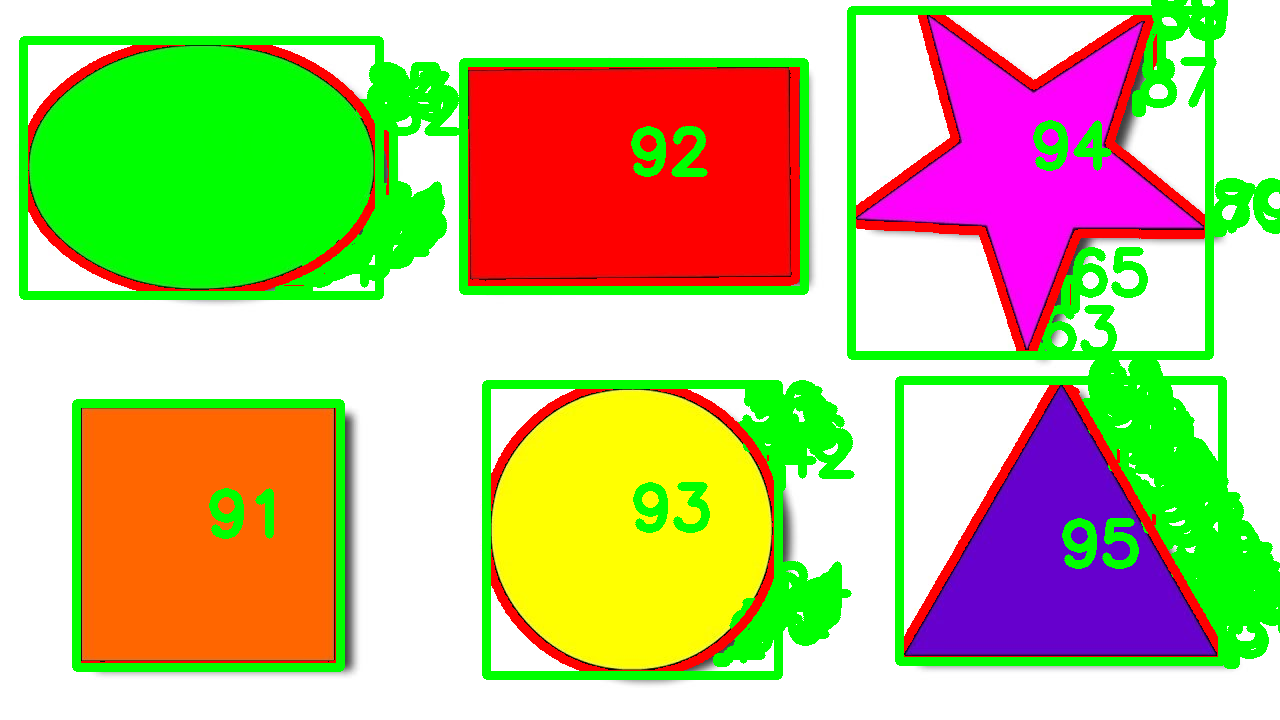

In [38]:
image = cv2.imread("LSCUPK3-5-1.jpg")
orginal_image = image.copy()

for (i, c) in enumerate(contours):
    M = cv2.moments(c)
    if M['m00'] != 0: # Check for non-zero area
        orig = label_contour_center(image, c)

cv2_imshow(image)

contours_left_to_right = sorted(contours,key = x_cord_contour,reverse = False)

for (i,c) in enumerate(contours_left_to_right):
    M = cv2.moments(c)
    if M['m00'] != 0: # Check for non-zero area
        cv2.drawContours(orginal_image, [c], -1, (0,0,255), 8)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 8)
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(orginal_image, (x, y), (x + w, y + h), (0, 255, 0), 8)

cv2_imshow(orginal_image)